In [176]:
class Query:
    def __init__(self, promoters_file='averaged_promoters.json', repressors_file='averaged_repressors.json'):
        with open(promoters_file) as r:
            self.gene_to_affecteds_zscore_promoters = json.load(r)
        with open(repressors_file) as r:
            self.gene_to_affecteds_zscore_repressors = json.load(r)
            
    def gene_info(self, gene_id):
        r = self.gene_represses(gene_id)
        p = self.gene_promotes(gene_id)
        if r is not None and p is not None:
            return r + p
        if r is not None:
            return r
        if p is not None:
            return p
        return None
    
    def gene_promotes(self, gene_id):
        if gene_id in self.gene_to_affecteds_zscore_promoters:
            return self.gene_to_affecteds_zscore_promoters[gene_id]
        return None
    
    def gene_represses(self, gene_id):
        if gene_id in self.gene_to_affecteds_zscore_repressors:
            return self.gene_to_affecteds_zscore_repressors[gene_id]
        return None
    
    def gene_vis_promotes(self, gene_id, n=5):
        %matplotlib inline
        import networkx as nx
        G = nx.Graph()
        base = gene_id
        nodes = [gene_id]
        count = 0
        p = self.gene_promotes(gene_id)
        if p is None:
            return
        for node in p:
            nodes.append(node['gene'])
            if count >= n:
                break
            count += 1
        G.add_nodes_from(nodes)
        for node in nodes:
            G.add_edge(base, node)
        import matplotlib.pyplot as plt
        nx.draw_networkx(G, with_labels=True)
        plt.show()
        
    def gene_vis_represses(self, gene_id, n=5):
        %matplotlib inline
        import networkx as nx
        G = nx.Graph()
        base = gene_id
        nodes = [gene_id]
        count = 1
        p = self.gene_represses(gene_id)
        if p is None:
            return
        for node in p:
            nodes.append(node['gene'])
            if count >= n:
                break
            count += 1
        G.add_nodes_from(nodes)
        for node in nodes:
            G.add_edge(base, node)
        import matplotlib.pyplot as plt
        nx.draw_networkx(G, with_labels=True)
        plt.show()

In [177]:
promoters_file = 'averaged_promoters.json'
repressors_file = 'averaged_repressors.json'
q = Query(promoters_file=promoters_file, repressors_file=repressors_file)

In [178]:
q.gene_info('BCL2')

[{'gene': 'CRTAP', 'score': -6.47389793396},
 {'gene': 'SMC1A', 'score': -6.329679012296666},
 {'gene': 'DSG2', 'score': -6.1536550521899995},
 {'gene': 'CEP57', 'score': -6.09007167816},
 {'gene': 'SNX13', 'score': -5.720143795009999},
 {'gene': 'PRKCH', 'score': -5.51308290164},
 {'gene': 'DEFB1', 'score': -5.401950041453333},
 {'gene': 'CSGALNACT1', 'score': -5.27112841606},
 {'gene': 'SFN', 'score': -5.215525031089999},
 {'gene': 'EPCAM', 'score': -5.027579665183333},
 {'gene': 'DPY19L1P1', 'score': -5.02083969116},
 {'gene': 'PLAC8', 'score': -4.946732401847501},
 {'gene': 'DCAF16', 'score': -4.86567497253},
 {'gene': 'XIST', 'score': -4.848298379354285},
 {'gene': 'STEAP1', 'score': -4.834180339178},
 {'gene': 'RAB36', 'score': -4.8164477348300005},
 {'gene': 'ESM1', 'score': -4.79685735703},
 {'gene': 'A2M', 'score': -4.77991914749},
 {'gene': 'CXCL12', 'score': -4.778775016468334},
 {'gene': 'PLP1', 'score': -4.77054977417},
 {'gene': 'ZER1', 'score': -4.76953601837},
 {'gene':

In [179]:
q.gene_promotes('BUB1B')

[{'gene': 'XIST', 'score': 7.7906999588},
 {'gene': 'CCNF', 'score': 6.851550102230001},
 {'gene': 'NT5E', 'score': 6.843699932100001},
 {'gene': 'ALDH1A1', 'score': 6.671743392940001},
 {'gene': 'G3BP1', 'score': 6.6409673690750015},
 {'gene': 'BASP1', 'score': 6.448582172389999},
 {'gene': 'TFAP2A', 'score': 6.44269323349},
 {'gene': 'CD9', 'score': 6.041025280954999},
 {'gene': 'S100A2', 'score': 5.77826023102},
 {'gene': 'WIF1', 'score': 5.659356117250001},
 {'gene': 'YME1L1', 'score': 5.603014826775},
 {'gene': 'CPE', 'score': 5.384140998125},
 {'gene': 'MMP2', 'score': 5.37559986115},
 {'gene': 'SFMBT1', 'score': 5.27115011215},
 {'gene': 'MRPS12', 'score': 5.1113471984875005},
 {'gene': 'DFFA', 'score': 5.10284996033},
 {'gene': 'ZBTB24', 'score': 5.09025001526},
 {'gene': 'ADH5', 'score': 5.0795148015025005},
 {'gene': 'TIAM1', 'score': 5.024488687515},
 {'gene': 'IFI16', 'score': 5.0},
 {'gene': 'KRT81', 'score': 4.965757608415},
 {'gene': 'NR1H3', 'score': 4.9402756691},
 {'g

In [180]:
q.gene_represses('BRCA1')

[{'gene': 'RASGRP1', 'score': -9.400499343869999},
 {'gene': 'MNAT1', 'score': -6.15345096588},
 {'gene': 'GMEB1', 'score': -6.120699882509999},
 {'gene': 'HOXB6', 'score': -6.049849987030001},
 {'gene': 'C3', 'score': -6.02651596069},
 {'gene': 'EPCAM', 'score': -5.667710018155999},
 {'gene': 'TBXAS1', 'score': -5.39070034027},
 {'gene': 'SLC26A2', 'score': -5.35060024261},
 {'gene': 'IL5RA', 'score': -5.347599983219999},
 {'gene': 'GIMAP6', 'score': -5.296100139619999},
 {'gene': 'SKI', 'score': -5.22994995117},
 {'gene': 'TCN1', 'score': -5.21082496643},
 {'gene': 'PXDN', 'score': -5.20001554489},
 {'gene': 'TSPYL1', 'score': -5.1352996826199995},
 {'gene': 'PPFIA2', 'score': -5.1005501747099995},
 {'gene': 'CSGALNACT1', 'score': -5.054030013084999},
 {'gene': 'HAUS5', 'score': -5.02374982834},
 {'gene': 'LRRC15', 'score': -5.00584983826},
 {'gene': 'SAMSN1', 'score': -5.00104999542},
 {'gene': 'PLAC8', 'score': -4.942696730293334},
 {'gene': 'INCENP', 'score': -4.891499996185001},


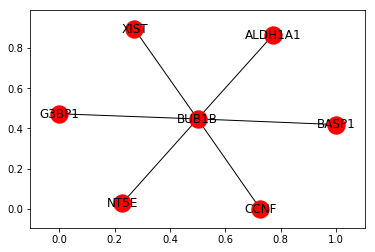

In [182]:
q.gene_vis_promotes('BUB1B')

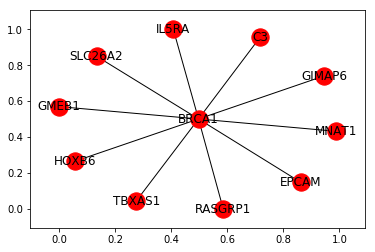

In [183]:
q.gene_vis_represses('BRCA1', n=10)